In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Position du soleil

équations et code pour calcul de la hauteur du soleil dans le ciel (et le flux solaire), en fonction de la position sur Terre, et de la date. 

## Calcul de l'ensoleillement

ref: http://www.plevenon-meteo.info/technique/theorie/enso/ensoleillement.html

#### Déclinaison solaire

Angle entre équateur et la direction Terre-Soleil:
du fait de l'inclinaison de l'axe de rotation de la Terre par rapport au plan de l'ecliptique, l'obliquité ($23,4°$).

In [30]:
toRad = np.pi/180.0

Delta = lambda jour: 23.45*np.sin( 360.0/365.0*( 284.0 + jour )*toRad )

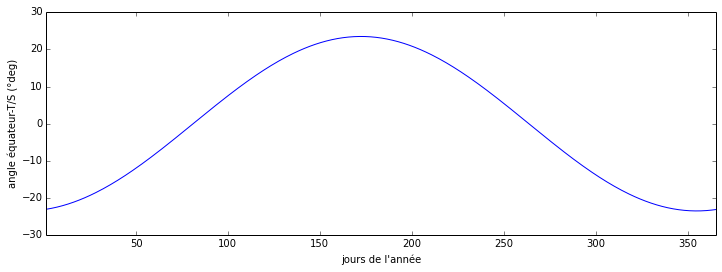

In [31]:
# Plot
jours = np.linspace(1, 365, 364)
plt.figure(figsize=(12, 4)  )
plt.plot( jours, Delta( jours )  )
plt.xlabel(u"jours de l'année")
plt.ylabel(u"angle équateur-T/S (°deg)")
plt.xlim( [1, 365] );

#### Inclinaison solaire

sinAlpha: angle entre l'horizon et le soleil

In [65]:
heure_GMT = 3
phi = 45.166 # Lattitude
lmdda = 5.71667 # Lonngitude E

Remarque: Décalage horaire (longitude): 24h pour 360°, donc 4min par degrée

In [70]:
24*60/360.0

4.0

In [67]:
def sinAlpha( phi, lmdda,  jour, heure_GMT ):
    H = heure_GMT + 4*lmdda/60.0
    eta = 15*(12-H)
    delta = Delta( jour )
    sinAlpha = np.sin( phi*toRad )*np.sin( delta*toRad ) + np.cos( phi*toRad )*np.cos( delta*toRad )*np.cos( eta*toRad )
    return sinAlpha

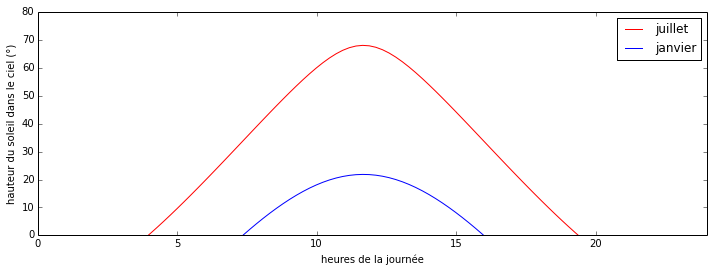

In [71]:
heures = np.linspace( 0, 24, 102 )

sin_alpha_juillet = sinAlpha( phi, lmdda, 180, heures )
alpha_juillet = 180/np.pi*np.arcsin( sin_alpha_juillet )

sin_alpha_janvier = sinAlpha( phi,lmdda, 1, heures )
alpha_janvier = 180/np.pi*np.arcsin( sin_alpha_janvier )


# Plot
jours = np.linspace(1, 365, 364)
plt.figure(figsize=(12, 4)  )
plt.plot( heures, alpha_juillet , 'r', label='juillet' )
plt.plot( heures, alpha_janvier , label='janvier' )
plt.xlabel(u"heures de la journée")
plt.ylabel(u"hauteur du soleil dans le ciel (°)")
plt.xlim( [0, 24] ); plt.ylim( [0, 80] );
plt.legend();

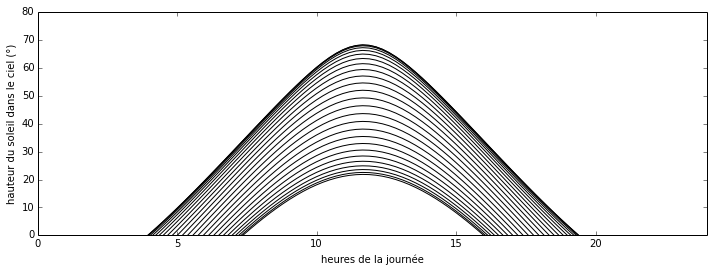

In [84]:
heures = np.linspace( 0, 24, 102 )

# Plot
jours = np.linspace(1, 365, 364)
plt.figure(figsize=(12, 4)  )

for j in range(1, 365/2, 7):
    alpha = 180/np.pi*np.arcsin( sinAlpha( phi,lmdda, j, heures ) )
    plt.plot( heures, alpha , 'k', label='juillet' )


plt.xlabel(u"heures de la journée")
plt.ylabel(u"hauteur du soleil dans le ciel (°)")
plt.xlim( [0, 24] ); plt.ylim( [0, 80] );

...pourquoi le prinptemps est diffférent de l'automne ? (le flux solaire est le même)

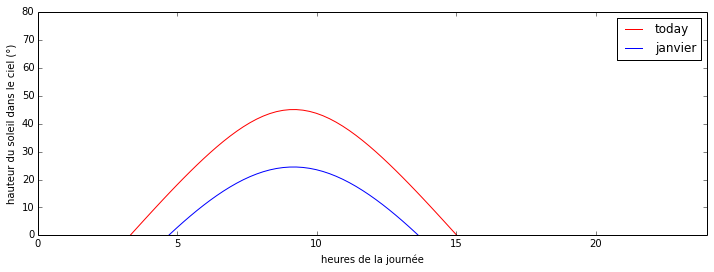

In [60]:
heures = np.linspace( 0, 24, 102 )

sin_alpha = sinAlpha( 42.5, 75, heures )
alpha_today = 180/np.pi*np.arcsin( sin_alpha )

sin_alpha_janvier = sinAlpha( 42.5, 1, heures )
alpha_janvier = 180/np.pi*np.arcsin( sin_alpha_janvier )


# Plot
jours = np.linspace(1, 365, 364)
plt.figure(figsize=(12, 4)  )
plt.plot( heures, alpha_today , 'r', label='today' )
plt.plot( heures, alpha_janvier , label='janvier' )
plt.xlabel(u"heures de la journée")
plt.ylabel(u"hauteur du soleil dans le ciel (°)")
plt.xlim( [0, 24] );  plt.ylim( [0, 80] );
plt.legend();

In [ ]:
altitude=1000

In [35]:
Sc = 1367 # W/m2
R_out = Sc*( 1 + 0.034*np.cos( 360.0/365.0*jour*toRad ))

# effet de l'altitude
# cf. https://fr.wikipedia.org/wiki/Variation_de_la_pression_atmosph%C3%A9rique_avec_l%27altitude

p_pAbs = (1 - 0.0065*altitude/288.15 )**5.255

Mzero = np.sqrt( 1229.0 + ( 614.0*sinAlpha )**2 ) - 614.0*sinAlpha

M = Mzero * p_pAbs

tau = 0.6
fact_R_dir = tau**M
fact_R_diff = (0.271 - 0.294*tau**M)

R_tot = R_out*sinAlpha*( fact_R_diff + fact_R_dir)

R_tot[ R_tot<0 ] = 0
return R_tot

NameError: name 'jour' is not defined